In [3]:
import cv2
import numpy as np

def apply_color_jitter(image, brightness=0, contrast=0, saturation=0, hue=0):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 색 공간 채널 분리
    h, s, v = cv2.split(hsv_image)

    # 각 채널에 ColorJitter 적용
    if brightness != 0:
        v = cv2.add(v, brightness)
    if contrast != 0:
        v = cv2.multiply(v, contrast)
    if saturation != 0:
        s = cv2.multiply(s, saturation)
    if hue != 0:
        h = cv2.add(h, hue)

    # 색 공간 채널 병합
    hsv_image = cv2.merge([h, s, v])

    # HSV를 BGR로 변환
    jittered_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    # 이미지 값을 0-255 범위로 클리핑
    jittered_image = np.clip(jittered_image, 0, 255)

    return jittered_image

def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=0):
    # GaussianBlur 적용
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

    return blurred_image

# 이미지 로드
image_path = '/content/drive/MyDrive/Refit/dataset/dataset_대분류/상의/m2082.jpg'
image = cv2.imread(image_path)

# ColorJitter 적용
jittered_image = apply_color_jitter(image, brightness=20, contrast=1.2, saturation=1.5, hue=10)

# GaussianBlur 적용
blurred_image = apply_gaussian_blur(image, kernel_size=(5, 5), sigma=0)

# 결과 이미지 저장
cv2.imwrite('/content/drive/MyDrive/Refit/jittered_image.jpg', jittered_image)
cv2.imwrite('/content/drive/MyDrive/Refit/blurred_image.jpg', blurred_image)

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import cv2
import numpy as np
import random

def apply_center_crop(image, crop_size=(200, 200)):
    # 이미지 크기
    height, width = image.shape[:2]

    # 센터 자르기의 시작 위치를 계산
    x = int((width - crop_size[0]) / 2)
    y = int((height - crop_size[1]) / 2)

    # 이미지 자르기
    cropped_image = image[y:y + crop_size[1], x:x + crop_size[0]]

    return cropped_image

# 이미지 로드
image_path = '/content/drive/MyDrive/Refit/dataset/dataset_대분류/상의/m2082.jpg'
image = cv2.imread(image_path)

# 센터 자르기 적용
center_cropped_image = apply_center_crop(image, crop_size=(200, 200))

cv2.imwrite('/content/drive/MyDrive/Refit/center_cropped_image.jpg', center_cropped_image)

True

In [6]:
import cv2
import numpy as np

def adjust_brightness(image, brightness):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 밝기 채널을 가져옴
    v = hsv_image[:, :, 2]

    # 밝기 조정
    v = np.clip(v + brightness, 0, 255)

    # 새로운 밝기 채널을 적용
    hsv_image[:, :, 2] = v

    # HSV를 BGR로 변환
    adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return adjusted_image

def adjust_contrast(image, contrast):
    # 대비 조정
    adjusted_image = cv2.convertScaleAbs(image, alpha=contrast, beta=0)

    return adjusted_image

def adjust_saturation(image, saturation):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 채도 조정
    s = hsv_image[:, :, 1]
    s = np.clip(s * saturation, 0, 255)
    hsv_image[:, :, 1] = s

    # HSV를 BGR로 변환
    adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return adjusted_image

# 이미지 로드
image_path = '/content/drive/MyDrive/Refit/dataset/dataset_대분류/상의/m2082.jpg'
image = cv2.imread(image_path)

# 밝기 조정
brightened_image = adjust_brightness(image, brightness=50)

# 대비 조정
contrasted_image = adjust_contrast(image, contrast=1.5)

# 채도 조정
saturated_image = adjust_saturation(image, saturation=1.5)

# 결과 이미지 저장
cv2.imwrite('/content/drive/MyDrive/Refit/brightened_image.jpg', brightened_image)
cv2.imwrite('/content/drive/MyDrive/Refit/contrasted_image.jpg', contrasted_image)
cv2.imwrite('/content/drive/MyDrive/Refit/saturated_image.jpg', saturated_image)

True

1/1 [==============================] - 1s 658ms/step


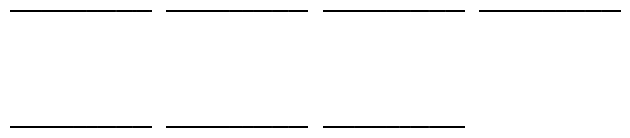

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = '/content/drive/MyDrive/Refit/dataset/dataset_대분류/상의/m2082.jpg'
image = cv2.imread(image_path)

# 이미지 전처리
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float32) / 255.0

# 이미지 크기 조정 (옵션)
# 만약 이미지가 너무 크면, 네트워크에 전달하기 전에 크기를 조정할 수 있습니다.
# 예를 들어, input_shape = (224, 224, 3)으로 입력을 받는 신경망의 경우:
image = cv2.resize(image, (224, 224))

# 이미지를 훈련된 신경망에 전달하여 Feature Map 추출
# 예를 들어, VGG16 신경망을 사용한다면:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights='imagenet', include_top=False)
preprocessed_image = preprocess_input(np.expand_dims(image, axis=0))
feature_maps = model.predict(preprocessed_image)

# Feature Map 시각화
# 여러 개의 Feature Map을 시각화하려면, 아래 코드를 반복하거나 조정할 수 있습니다.
for i, fmap in enumerate(feature_maps[0]):
    plt.subplot(4, 4, i+1)  # 적절한 subplot 크기로 조정하여 시각화
    plt.imshow(fmap, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 262MB/s]


ValueError: ignored

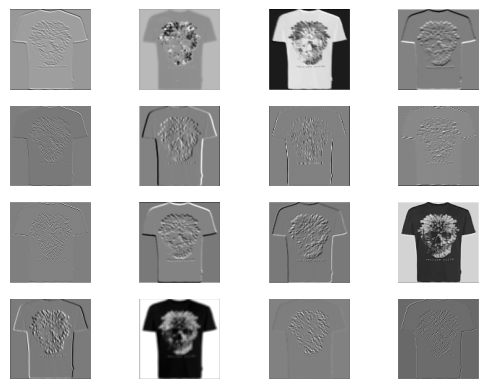

In [15]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 불러오기
image_path = '/content/drive/MyDrive/Refit/dataset/dataset_대분류/상의/m2082.jpg'
image = Image.open(image_path)

# 이미지 전처리
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# GPU를 사용할 경우
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 이미지를 훈련된 신경망에 전달하여 Feature Map 추출
# 예를 들어, ResNet50 신경망을 사용한다면:
model = models.resnet50(pretrained=True)
model = model.to(device)
model.eval()
with torch.no_grad():
    input_batch = input_batch.to(device)
    feature_maps = model.conv1(input_batch)

# Feature Map 시각화
for i in range(feature_maps.shape[1]):
    plt.subplot(4, 4, i+1)  # 적절한 subplot 크기로 조정하여 시각화
    plt.imshow(feature_maps[0, i].cpu(), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()